# Ellipticity coefficients

Ellipticity corrections $\delta t$ can be written in terms of three ellipticity coefficients $\left(\sigma_0, \sigma_1, \sigma_2 \right)$ as
\begin{equation*} \label{tau_legendre_addition}
    \delta t = \sum_{m=0}^{2} \sigma_{m} P_{2, m}(\cos \vartheta_{0}) \cos m \zeta
\end{equation*}
where $P_{2, m}(x)$ are the Schmidt semi-normalised associated Legendre polynomials of degree 2 and order $m$, $\vartheta_{0}$ is the source co-latitude, and $\zeta$ is the azimuth from source to receiver. Typically users should call the main `ellipticity_correction` routine to directly obtain $\delta t$. However, should it be desired, it is also possible to output the ellipticity coefficients using the `ellipticity_coefficients` routine as follows:

In [1]:
from obspy.taup import TauPyModel
from ellipticipy.tools import ellipticity_coefficients

In [2]:
model = TauPyModel("prem")
arrivals = model.get_ray_paths(
    source_depth_in_km=300.0, distance_in_degree=60.0, phase_list=["ScS"]
)
ellipticity_coefficients(arrivals)

[[-0.8813180508451139, -0.7543522309656383, -1.1311086952166596]]

Tables of ellipticity coefficients for different seismic phases can be found in the literature e.g. [Dziewonski and Gilbert (1976)](https://doi.org/10.1111/j.1365-246X.1976.tb00271.x) and [Kennett and Gudmundsson (1996)](https://doi.org/10.1111/j.1365-246X.1996.tb01533.x). For the ScS example given above, Table 7 of [Dziewonski and Gilbert (1976)](https://doi.org/10.1111/j.1365-246X.1976.tb00271.x) provides ellipticity coefficients (-0.89, -0.76, -1.14) in good agreement with those above.

## Tables of ellipticity coefficients
Ellipticipy also includes a convenience wrapper `table_ellipticity_coefficients` which produces a complete table of ellipticity coefficients for a given seismic phase. The table contains the ray parameters, epicentral distances, arrival times, and ellipticity coefficients for the full range of ray parameters for which the phase exists. The example below illustrates the use of this table to plot the ellipticity coefficients as a function of epicentral distance for SKKS at a depth of 200 km, as shown in Figure 1 of the manuscript.    

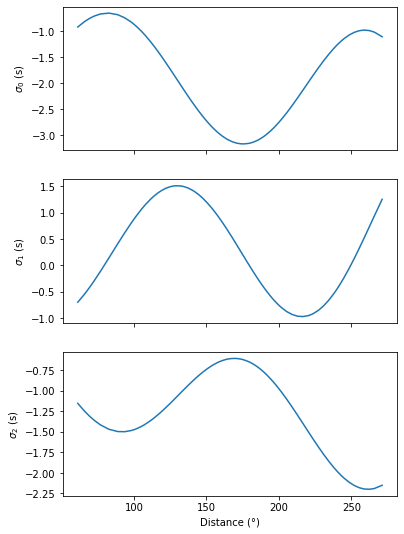

In [3]:
import matplotlib.pyplot as plt
from ellipticipy.tools import table_ellipticity_coefficients

table = table_ellipticity_coefficients("SKKS", model, source_depth_in_km=200.0)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6,9))
ax1.plot(table["degrees"], table['ellip_coeffs'][:,0], '-')
ax1.set_ylabel("$\sigma_0$ (s)")
ax2.plot(table["degrees"], table['ellip_coeffs'][:,1], '-')
ax2.set_ylabel("$\sigma_1$ (s)")
ax3.plot(table["degrees"], table['ellip_coeffs'][:,2], '-')
ax3.set_ylabel("$\sigma_2$ (s)")
ax3.set_xlabel("Distance (°)")
plt.show()